In [1]:
import numpy as np  # 引入numpy、pandas库
import pandas as pd
from dbfread import DBF
from pandas import DataFrame
import matplotlib.pyplot as plt
import proplot as plot

import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from IPython.display import display

import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter  # 刻度格式
import matplotlib.ticker as mticker  # 添加网格线
import math
from matplotlib import patches
import os
from matplotlib import font_manager as fm, rcParams

pd.options.display.max_columns = None

# 1.筛选第一个到达最大值的点
# 2.去掉USE_WIND里面小于34的点，分别记录第一个最大值和最小值的点
# 3.画出两个时间段USE_WIND最小点 为ab图 输出点数
# 4.画出两个时间段USE_WIND最大点 为cd图

path = "./dataset/south_patric.dbf"
df_raw = pd.DataFrame(iter(DBF(path)))

df = df_raw[(df_raw['USA_STATUS'] != "EX") 
            & (df_raw['USA_STATUS'] != "SS") 
            & (df_raw['USA_STATUS'] != "PT") 
            & (df_raw['USA_STATUS'] != "IN")
            & (df_raw['USA_STATUS'] != "DS") 
            & (df_raw['USA_STATUS'] != "WV")
            & (df_raw['USA_STATUS'] != "ET") 
            & (df_raw['USA_STATUS'] != "MD") 
            & (df_raw['USA_STATUS'] != "XX")]# 去掉表格属性USA_STATUS为EX的数据

df = df[df['DIST2LAND'] > 0] # 去掉陆地点

def min_index(min_value, df_min):
    # 找出第一个出现最小值的index
    val_list = []
    val_list.append(min_value)
    val_list.append("end")
    # 获取基于条件的第一条
    index = df_min.USA_WIND.isin(val_list).idxmax()
    return index

def year_min_Lon_Lat(df_, year):
    # 筛选本年度year的最小台风的经纬度
    df_year = df_[df_['year'] == year]
    # 筛选风速大于34
    df_typhSpeed_moreThan_34 = df_year[df_year['USA_WIND'] >= 34]
    # 列出台风编号
    typh_number = list(set(df_typhSpeed_moreThan_34['NUMBER']))
    df_year_Lon_Lat = pd.DataFrame(columns=['YEAR','NUMBER','LON','LAT'], index=None)
    # 根据编号等于1的所有台风

    for number in typh_number:
        df_min = df_typhSpeed_moreThan_34[df_typhSpeed_moreThan_34['NUMBER']==number]
        # 查找当前台风的风速的最小值
        typh_num_min = df_min.USA_WIND.min()
        typh_num_min_index = min_index(typh_num_min, df_min)
        min_lon = df_min.at[typh_num_min_index, "LON"]
        min_lat = df_min.at[typh_num_min_index, "LAT"]
        tmp = [year, number, min_lon, min_lat]
        df_year_Lon_Lat.loc[len(df_year_Lon_Lat)] = tmp
        df_year_Lon_Lat['YEAR']=df_year_Lon_Lat['YEAR'].astype(int)
        df_year_Lon_Lat['NUMBER']=df_year_Lon_Lat['NUMBER'].astype(int)
    return df_year_Lon_Lat

phase1 = [i for i in range(1980,1999)]

phase2 = [i for i in range(2000,2024)]

df_min_Lon_Lat_phase1 = pd.DataFrame(columns=['YEAR','NUMBER','LON','LAT'], index=None)
for year in phase1:
    df_tmp = year_min_Lon_Lat(df, year)
    df_min_Lon_Lat_phase1 = pd.concat([df_min_Lon_Lat_phase1,df_tmp], ignore_index=True)

df_min_Lon_Lat_phase2 = pd.DataFrame(columns=['YEAR','NUMBER','LON','LAT'], index=None)
for year in phase2:
    df_tmp = year_min_Lon_Lat(df, year)
    df_min_Lon_Lat_phase2 = pd.concat([df_min_Lon_Lat_phase2,df_tmp], ignore_index=True)

    

/home/lk/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [20]:
df_min_Lon_Lat_phase2.loc[(df_min_Lon_Lat_phase2['LON'] >= 200) & 
                          (df_min_Lon_Lat_phase2['LON'] <= 230) &
                          (df_min_Lon_Lat_phase2['LAT'] >= -17) & 
                          (df_min_Lon_Lat_phase2['LAT'] <= -7)]

,YEAR,NUMBER,LON,LAT


In [22]:
df_min_Lon_Lat_phase2.loc[(df_min_Lon_Lat_phase2['LON'] >= 200) & 
                          (df_min_Lon_Lat_phase2['LON'] <= 230) &
                          (df_min_Lon_Lat_phase2['LAT'] >= -17) & 
                          (df_min_Lon_Lat_phase2['LAT'] <= -7)]

,YEAR,NUMBER,LON,LAT
69,2007,2,201.93,-13.77
100,2010,13,201.40,-9.25
138,2015,4,208.62,-12.38


In [12]:
# 第一阶段方框里面的点
# LON [160,180] LAT[-17,7]
df_min_Lon_Lat_phase1 = df_min_Lon_Lat_phase1.loc[(df_min_Lon_Lat_phase1['LON'] >= 160) & 
                          (df_min_Lon_Lat_phase1['LON'] <= 180) &
                          (df_min_Lon_Lat_phase1['LAT'] >= -17) & 
                          (df_min_Lon_Lat_phase1['LAT'] <= -7)]

In [11]:
# 第二阶段方框里面的点
df_min_Lon_Lat_phase2 = df_min_Lon_Lat_phase2.loc[(df_min_Lon_Lat_phase2['LON'] >= 200) & 
                          (df_min_Lon_Lat_phase2['LON'] <= 230) &
                          (df_min_Lon_Lat_phase2['LAT'] >= -17) & 
                          (df_min_Lon_Lat_phase2['LAT'] < -7)]

df_min_Lon_Lat_phase2

,YEAR,NUMBER,LON,LAT


In [2]:
# 第一阶段方框里面的点
# LON [160,180] LAT[-17,7]
df_min_phase1 = df_min_Lon_Lat_phase1.loc[(df_min_Lon_Lat_phase1['LON'] >= 160) & 
                          (df_min_Lon_Lat_phase1['LON'] <= 190) &
                          (df_min_Lon_Lat_phase1['LAT'] >= -20) & 
                          (df_min_Lon_Lat_phase1['LAT'] < -8)]

# 第二阶段方框里面的点
df_min_phase2 = df_min_Lon_Lat_phase2.loc[(df_min_Lon_Lat_phase2['LON'] >= 200) & 
                          (df_min_Lon_Lat_phase2['LON'] <= 230) &
                          (df_min_Lon_Lat_phase2['LAT'] >= -20) & 
                          (df_min_Lon_Lat_phase2['LAT'] < -8)]

min_len1 = len(df_min_Lon_Lat_phase1)
min_lon1 = df_min_Lon_Lat_phase1['LON'].mean()
min_lat1 = df_min_Lon_Lat_phase1['LAT'].mean()
print("In phase 1, the number of min points is %s, the mean of lon and lat is (%.2f,%.2f)."%(min_len1,min_lon1, min_lat1))

max_len2 = len(df_min_Lon_Lat_phase2)
max_lon2 = df_min_Lon_Lat_phase2['LON'].mean()
max_lat2 = df_min_Lon_Lat_phase2['LAT'].mean()
print("In phase 2, the number of min points is %s, the mean of lon and lat is (%.2f,%.2f)."%(max_len2,max_lon2, max_lat2))

In phase 1, the number of min points is 205, the mean of lon and lat is (88.44,-15.20).
In phase 2, the number of min points is 221, the mean of lon and lat is (99.81,-15.58).


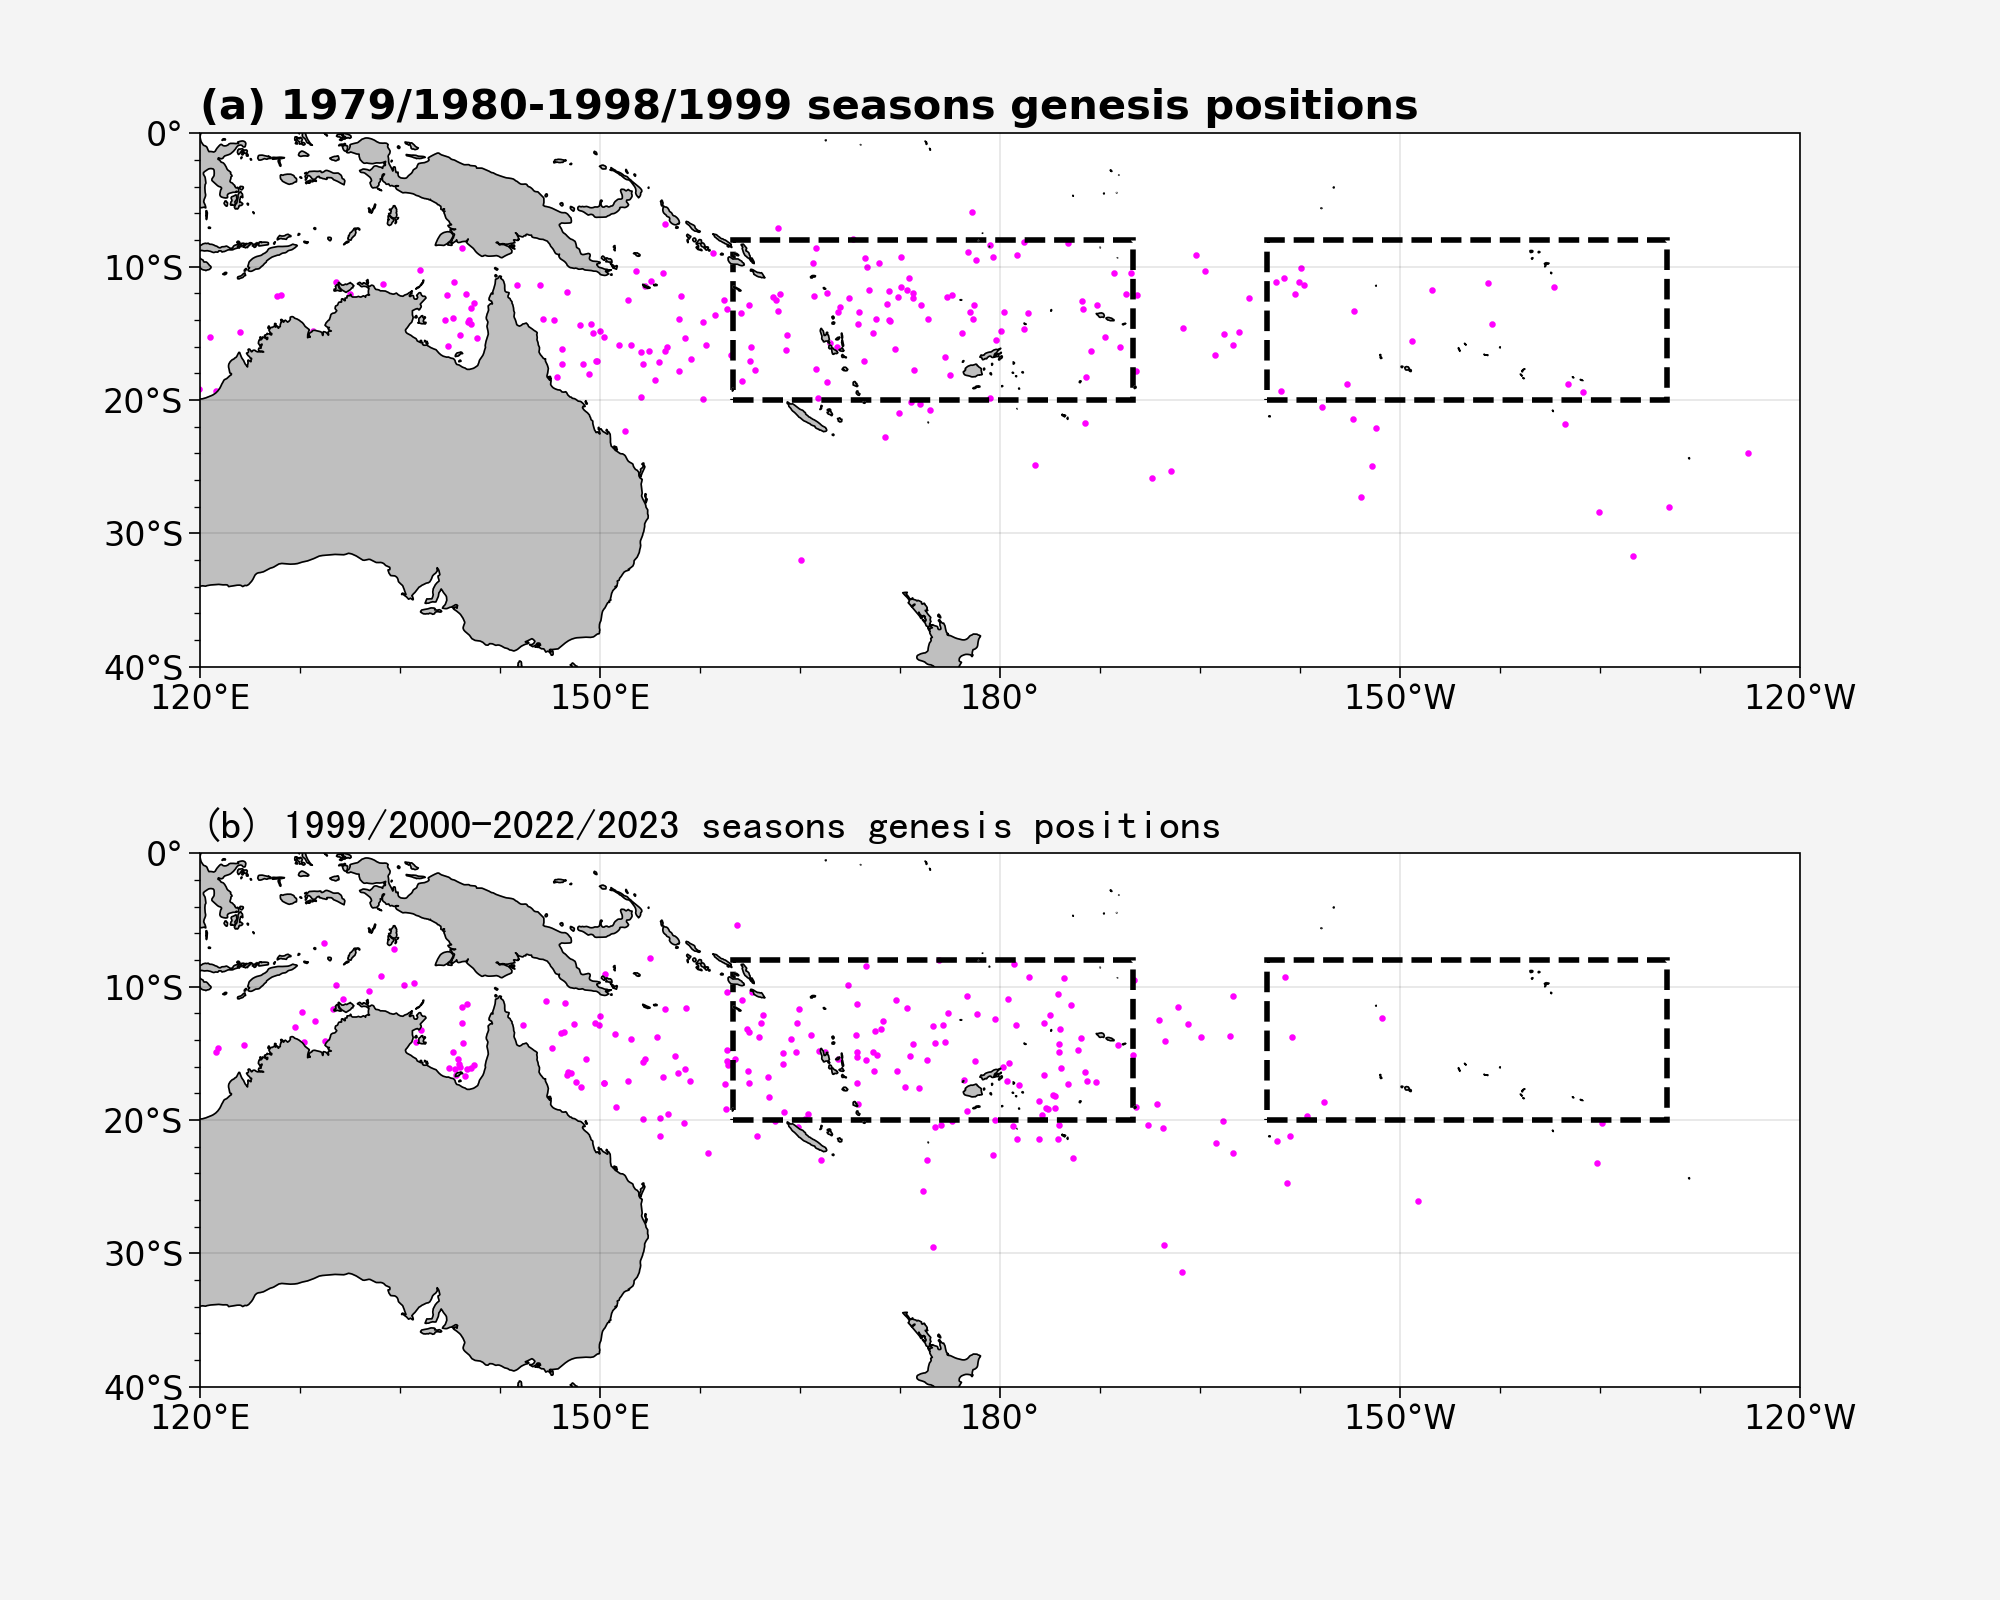

In [10]:
from matplotlib import rcParams
from matplotlib import patches
import cartopy.mpl.ticker as cticker

config = {
    "font.family": 'Times New Roman',
    "font.size": 12,
    "mathtext.fontset":'stix',
    'axes.unicode_minus': False 
         }
rcParams.update(config)
fig = plt.figure(figsize=(10,8))
proj = ccrs.PlateCarree(central_longitude=180)

leftlon, rightlon, lowerlat, upperlat = (120, 240, -40, 0)
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()

####### 图a
fig_ax1 = fig.add_axes([0.1, 0.35, 0.8, 0.8], projection = proj)
fig_ax1.set_global()
fig_ax1.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
land = cfeature.NaturalEarthFeature('physical','land','50m',edgecolor='face', facecolor=cfeature.COLORS['land'])
fig_ax1.add_feature(land,facecolor='0.75')
fig_ax1.add_feature(cfeature.COASTLINE.with_scale('50m'))

fig_ax1.set_xticks([ -150, -120, 120, 150, 180], crs=ccrs.PlateCarree())
fig_ax1.set_yticks(np.arange(-40,1,10), crs=ccrs.PlateCarree())

fig_ax1.xaxis.set_major_formatter(LongitudeFormatter())
fig_ax1.yaxis.set_major_formatter(LatitudeFormatter())

fig_ax1.set_title('(a) 1979/1980-1998/1999 seasons genesis positions',fontweight='bold',
                  loc='left',fontsize =15)

fig_ax1.scatter(df_min_Lon_Lat_phase1['LON'], df_min_Lon_Lat_phase1['LAT'],
        s=3, c = '#FF00FF', marker = 'o', 
        transform=ccrs.PlateCarree())
# 小于0的数均加上360
df_min_Lon_Lat_phase1['LON'] = df_min_Lon_Lat_phase1['LON'].mask(df_min_Lon_Lat_phase1['LON'] < 0,(df_min_Lon_Lat_phase1['LON'] + 360))
black_quarter_a1 = patches.Rectangle((160,-20),30,12,linestyle = 'dashed', 
                                  lw=2, edgecolor='black', facecolor='none',transform=ccrs.PlateCarree())
black_quarter_a2 = patches.Rectangle((200,-20),30,12,linestyle = 'dashed', 
                                  lw=2, edgecolor='black', facecolor='none',transform=ccrs.PlateCarree())
fig_ax1.add_patch(black_quarter_a1)
fig_ax1.add_patch(black_quarter_a2)


# ======================= 图b =============================

fig_ax2 = fig.add_axes([0.1, -0.1, 0.8, 0.8], projection = proj)
fig_ax2.set_global()
fig_ax2.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
land = cfeature.NaturalEarthFeature('physical','land','50m',edgecolor='face', facecolor=cfeature.COLORS['land'])
fig_ax2.add_feature(land,facecolor='0.75')
fig_ax2.add_feature(cfeature.COASTLINE.with_scale('50m'))

fig_ax2.set_xticks([ -150, -120, 120, 150, 180], crs=ccrs.PlateCarree())
fig_ax2.set_yticks(np.arange(-40,1,10), crs=ccrs.PlateCarree())

fig_ax2.xaxis.set_major_formatter(LongitudeFormatter())
fig_ax2.yaxis.set_major_formatter(LatitudeFormatter())

fig_ax2.set_title('(b) 1999/2000-2022/2023 seasons genesis positions',fontweight='bold',
                  loc='left',fontsize =15,fontproperties='SimHei')

fig_ax2.scatter(df_min_Lon_Lat_phase2['LON'], df_min_Lon_Lat_phase2['LAT'],
        s=3, c = '#FF00FF', marker = 'o', 
        transform=ccrs.PlateCarree())
# 小于0的数均加上360
df_min_Lon_Lat_phase2['LON'] = df_min_Lon_Lat_phase2['LON'].mask(df_min_Lon_Lat_phase2['LON'] < 0,(df_min_Lon_Lat_phase2['LON'] + 360))
black_quarter_b1 = patches.Rectangle((160,-20),30,12,linestyle = 'dashed', 
                                  lw=2, edgecolor='black', facecolor='none',transform=ccrs.PlateCarree())
black_quarter_b2 = patches.Rectangle((200,-20),30,12,linestyle = 'dashed', 
                                  lw=2, edgecolor='black', facecolor='none',transform=ccrs.PlateCarree())
fig_ax2.add_patch(black_quarter_b1)
fig_ax2.add_patch(black_quarter_b2)

plt.savefig("Storm0304_min.png",dpi=300,bbox_inches='tight')
plt.show()

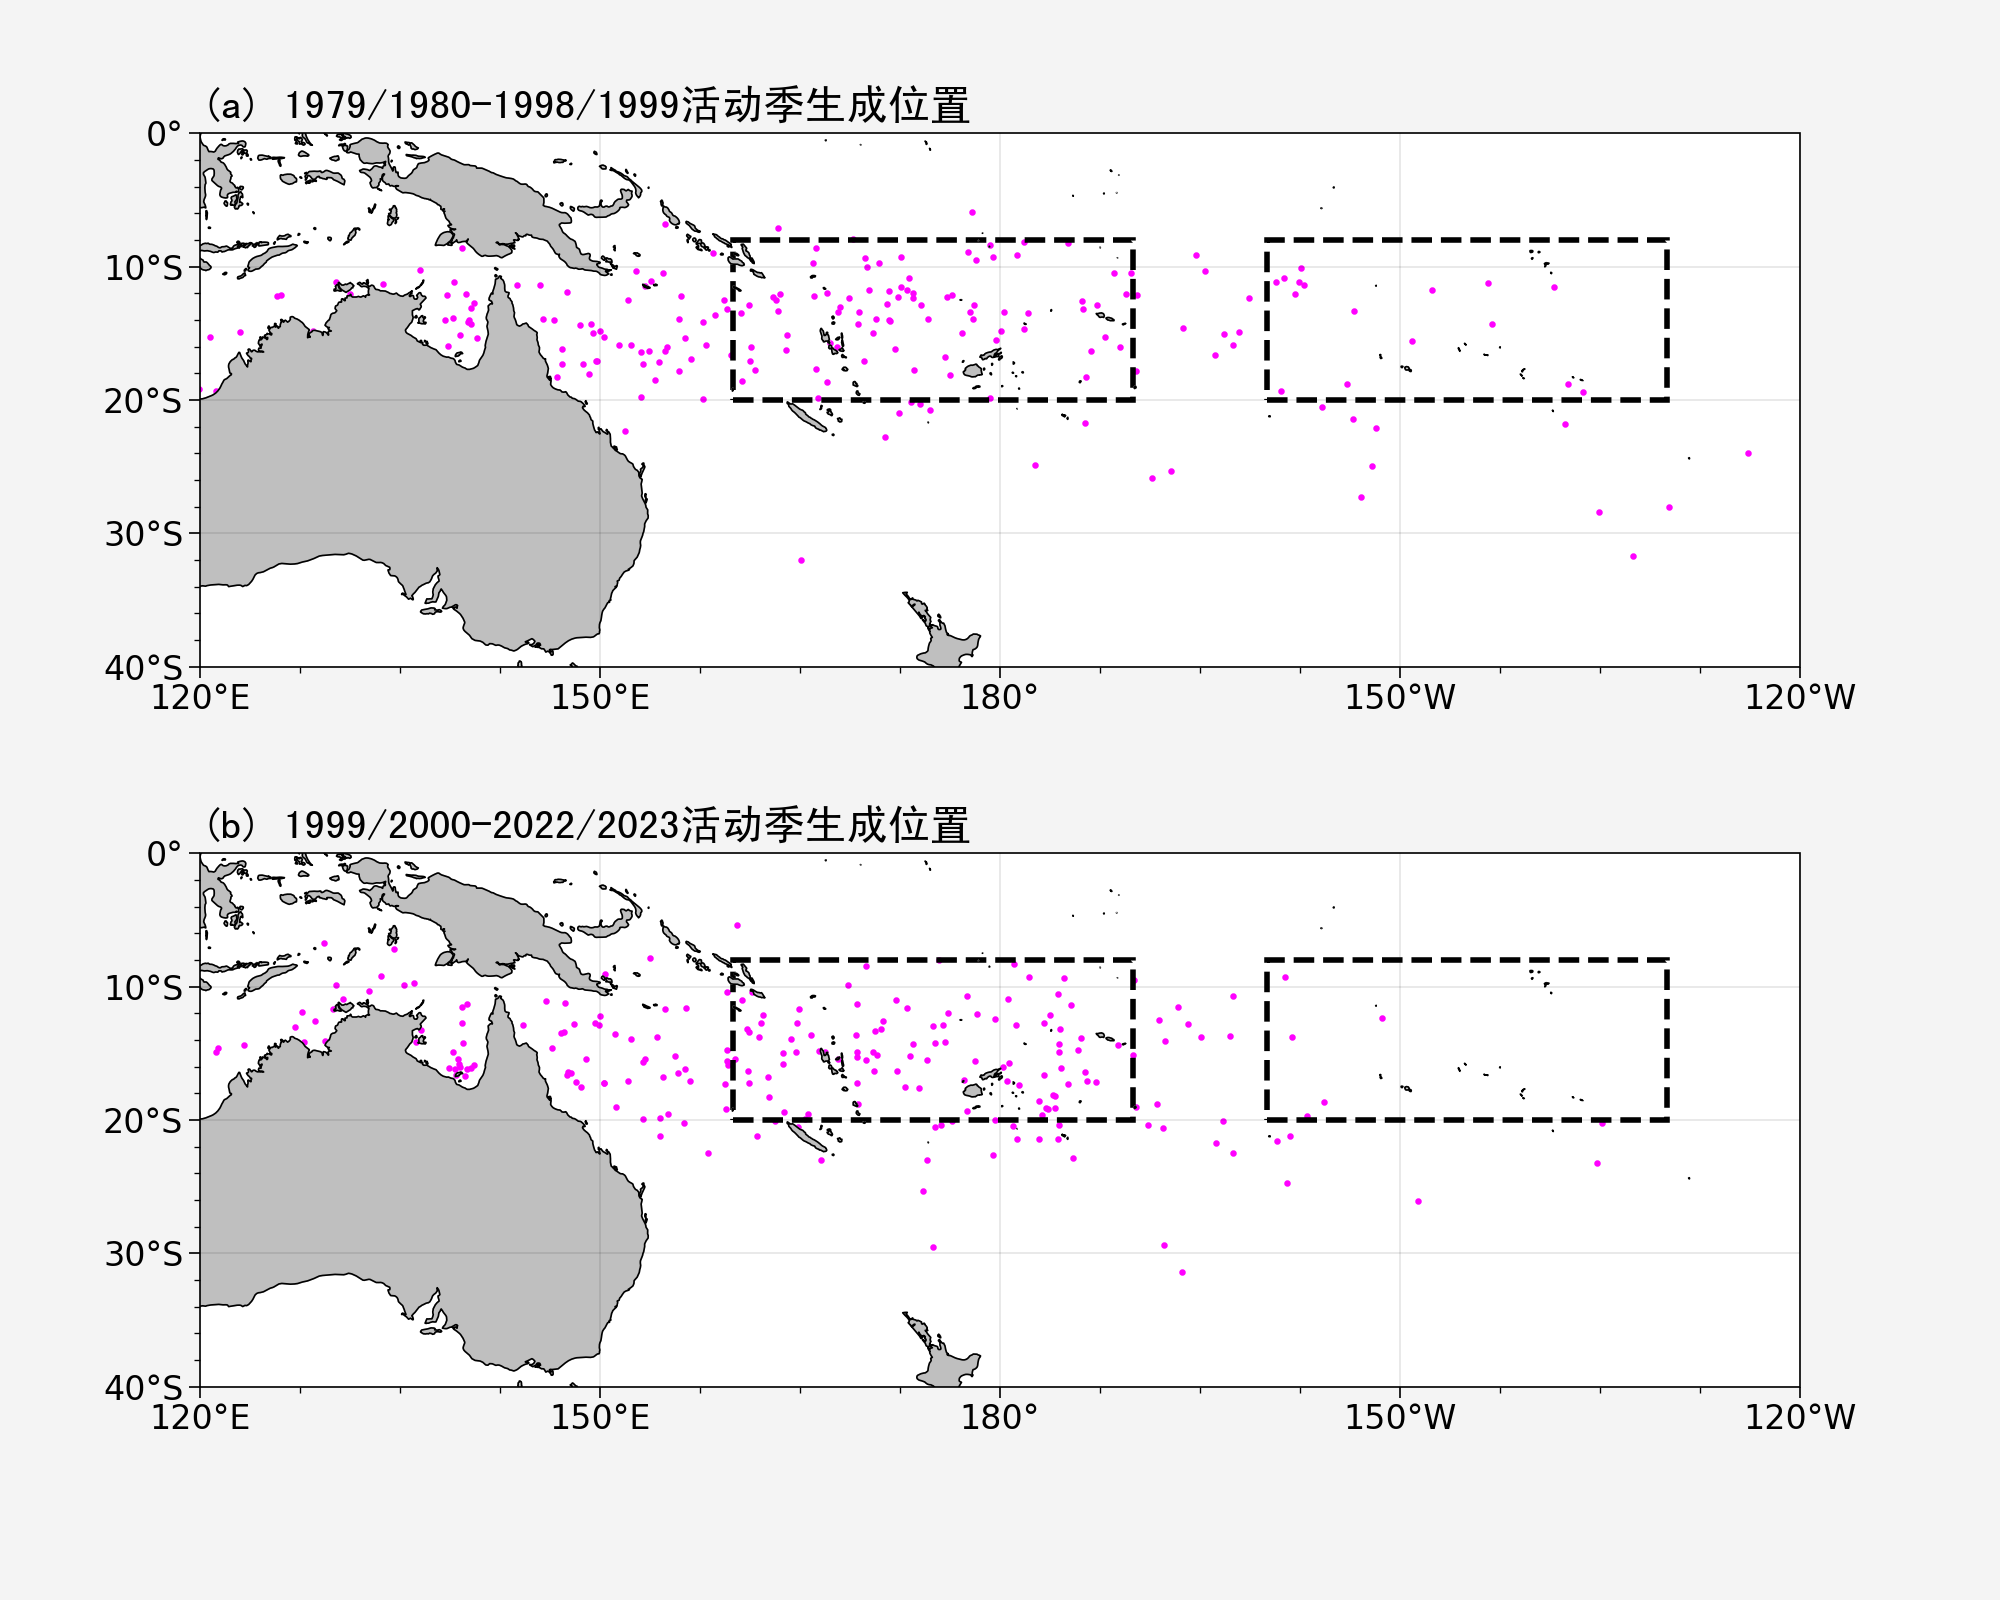

In [5]:
from matplotlib import rcParams
from matplotlib import patches
import cartopy.mpl.ticker as cticker
import matplotlib

matplotlib.font_manager.fontManager.addfont('./font/SimHei.ttf') 
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False#用来正常显示负号

config = {
    "font.family": 'Times New Roman',
    "font.size": 12,
    "mathtext.fontset":'stix',
    'axes.unicode_minus': False 
         }
rcParams.update(config)
fig = plt.figure(figsize=(10,8))
proj = ccrs.PlateCarree(central_longitude=180)

leftlon, rightlon, lowerlat, upperlat = (120, 240, -40, 0)
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()

####### 图a
fig_ax1 = fig.add_axes([0.1, 0.35, 0.8, 0.8], projection = proj)
fig_ax1.set_global()
fig_ax1.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
land = cfeature.NaturalEarthFeature('physical','land','50m',edgecolor='face', facecolor=cfeature.COLORS['land'])
fig_ax1.add_feature(land,facecolor='0.75')
fig_ax1.add_feature(cfeature.COASTLINE.with_scale('50m'))

fig_ax1.set_xticks([ -150, -120, 120, 150, 180], crs=ccrs.PlateCarree())
fig_ax1.set_yticks(np.arange(-40,1,10), crs=ccrs.PlateCarree())

fig_ax1.xaxis.set_major_formatter(LongitudeFormatter())
fig_ax1.yaxis.set_major_formatter(LatitudeFormatter())

fig_ax1.set_title('(a) 1979/1980-1998/1999活动季生成位置',fontweight='bold',
                  loc='left',fontsize =15,fontproperties='SimHei')

fig_ax1.scatter(df_min_Lon_Lat_phase1['LON'], df_min_Lon_Lat_phase1['LAT'],
        s=3, c = '#FF00FF', marker = 'o', 
        transform=ccrs.PlateCarree())
# 小于0的数均加上360
df_min_Lon_Lat_phase1['LON'] = df_min_Lon_Lat_phase1['LON'].mask(df_min_Lon_Lat_phase1['LON'] < 0,(df_min_Lon_Lat_phase1['LON'] + 360))

black_quarter_a1 = patches.Rectangle((160,-20),30,12,linestyle = 'dashed', 
                                  lw=2, edgecolor='black', facecolor='none',transform=ccrs.PlateCarree())
black_quarter_a2 = patches.Rectangle((200,-20),30,12,linestyle = 'dashed', 
                                  lw=2, edgecolor='black', facecolor='none',transform=ccrs.PlateCarree())
fig_ax1.add_patch(black_quarter_a1)
fig_ax1.add_patch(black_quarter_a2)


# ======================= 图b =============================

fig_ax2 = fig.add_axes([0.1, -0.1, 0.8, 0.8], projection = proj)
fig_ax2.set_global()
fig_ax2.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
land = cfeature.NaturalEarthFeature('physical','land','50m',edgecolor='face', facecolor=cfeature.COLORS['land'])
fig_ax2.add_feature(land,facecolor='0.75')
fig_ax2.add_feature(cfeature.COASTLINE.with_scale('50m'))

fig_ax2.set_xticks([ -150, -120, 120, 150, 180], crs=ccrs.PlateCarree())
fig_ax2.set_yticks(np.arange(-40,1,10), crs=ccrs.PlateCarree())

fig_ax2.xaxis.set_major_formatter(LongitudeFormatter())
fig_ax2.yaxis.set_major_formatter(LatitudeFormatter())

fig_ax2.set_title('(b) 1999/2000-2022/2023活动季生成位置',fontweight='bold',
                  loc='left',fontsize =15,fontproperties='SimHei')

fig_ax2.scatter(df_min_Lon_Lat_phase2['LON'], df_min_Lon_Lat_phase2['LAT'],
        s=3, c = '#FF00FF', marker = 'o', 
        transform=ccrs.PlateCarree())
# 小于0的数均加上360
df_min_Lon_Lat_phase2['LON'] = df_min_Lon_Lat_phase2['LON'].mask(df_min_Lon_Lat_phase2['LON'] < 0,(df_min_Lon_Lat_phase2['LON'] + 360))

black_quarter_b1 = patches.Rectangle((160,-20),30,12,linestyle = 'dashed', 
                                  lw=2, edgecolor='black', facecolor='none',transform=ccrs.PlateCarree())
black_quarter_b2 = patches.Rectangle((200,-20),30,12,linestyle = 'dashed', 
                                  lw=2, edgecolor='black', facecolor='none',transform=ccrs.PlateCarree())
fig_ax2.add_patch(black_quarter_b1)
fig_ax2.add_patch(black_quarter_b2)

plt.savefig("Storm0304_min_cn.png",dpi=300,bbox_inches='tight')
plt.show()

In [6]:
def max_index(max_value, df_max):
    # 找出第一个出现最小值的index
    val_list = []
    val_list.append(max_value)
    val_list.append("end")
    # 获取基于条件的第一条
    index = df_max.USA_WIND.isin(val_list).idxmax()
    return index

def year_max_Lon_Lat(df_, year):
    # 筛选本年度year的最小台风的经纬度
    df_year = df_[df_['year'] == year]
    # 筛选风速大于34
    df_typhSpeed_moreThan_34 = df_year[df_year['USA_WIND'] >= 34]
    # 列出台风编号
    typh_number = list(set(df_typhSpeed_moreThan_34['NUMBER']))
    df_year_Lon_Lat = pd.DataFrame(columns=['YEAR','NUMBER','LON','LAT'], index=None)
    # 根据编号等于1的所有台风

    for number in typh_number:
        df_max = df_typhSpeed_moreThan_34[df_typhSpeed_moreThan_34['NUMBER']==number]
        # 查找当前台风的风速的最小值
        typh_num_max = df_max.USA_WIND.max()
        typh_num_max_index = max_index(typh_num_max, df_max)
        max_lon = df_max.at[typh_num_max_index, "LON"]
        max_lat = df_max.at[typh_num_max_index, "LAT"]
        tmp = [year, number, max_lon, max_lat]
        df_year_Lon_Lat.loc[len(df_year_Lon_Lat)] = tmp
        df_year_Lon_Lat['YEAR']=df_year_Lon_Lat['YEAR'].astype(int)
        df_year_Lon_Lat['NUMBER']=df_year_Lon_Lat['NUMBER'].astype(int)
    return df_year_Lon_Lat


phase1 = [i for i in range(1980,1999)]

phase2 = [i for i in range(2000,2024)]

df_max_Lon_Lat_phase1 = pd.DataFrame(columns=['YEAR','NUMBER','LON','LAT'], index=None)
for year in phase1:
    df_tmp = year_max_Lon_Lat(df, year)
    df_max_Lon_Lat_phase1 = pd.concat([df_max_Lon_Lat_phase1,df_tmp], ignore_index=True)

df_max_Lon_Lat_phase2 = pd.DataFrame(columns=['YEAR','NUMBER','LON','LAT'], index=None)
for year in phase2:
    df_tmp = year_max_Lon_Lat(df, year)
    df_max_Lon_Lat_phase2 = pd.concat([df_max_Lon_Lat_phase2,df_tmp], ignore_index=True)

    

In [7]:
df_max_phase1 = df_max_Lon_Lat_phase1.loc[(df_max_Lon_Lat_phase1['LON'] >= 160) & 
                          (df_max_Lon_Lat_phase1['LON'] <= 190) &
                          (df_max_Lon_Lat_phase1['LAT'] >= -20) & 
                          (df_max_Lon_Lat_phase1['LAT'] < -8)]

df_max_phase2 = df_max_Lon_Lat_phase2.loc[(df_max_Lon_Lat_phase2['LON'] >= 200) & 
                          (df_max_Lon_Lat_phase2['LON'] <= 230) &
                          (df_max_Lon_Lat_phase2['LAT'] >= -20) & 
                          (df_max_Lon_Lat_phase2['LAT'] < -8)]


max_len1 = len(df_max_Lon_Lat_phase1)
max_lon1 = df_max_Lon_Lat_phase1['LON'].mean()
max_lat1 = df_max_Lon_Lat_phase1['LAT'].mean()
print("In phase 1, the number of min points is %s, the mean of lon and lat is (%.2f,%.2f)."%(max_len1,max_lon1, max_lat1))

max_len2 = len(df_max_Lon_Lat_phase2)
max_lon2 = df_max_Lon_Lat_phase2['LON'].mean()
max_lat2 = df_max_Lon_Lat_phase2['LAT'].mean()
print("In phase 2, the number of max points is %s, the mean of lon and lat is (%.2f,%.2f)."%(max_len2,max_lon2, max_lat2))

In phase 1, the number of min points is 205, the mean of lon and lat is (88.06,-17.53).
In phase 2, the number of max points is 221, the mean of lon and lat is (99.74,-17.87).


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


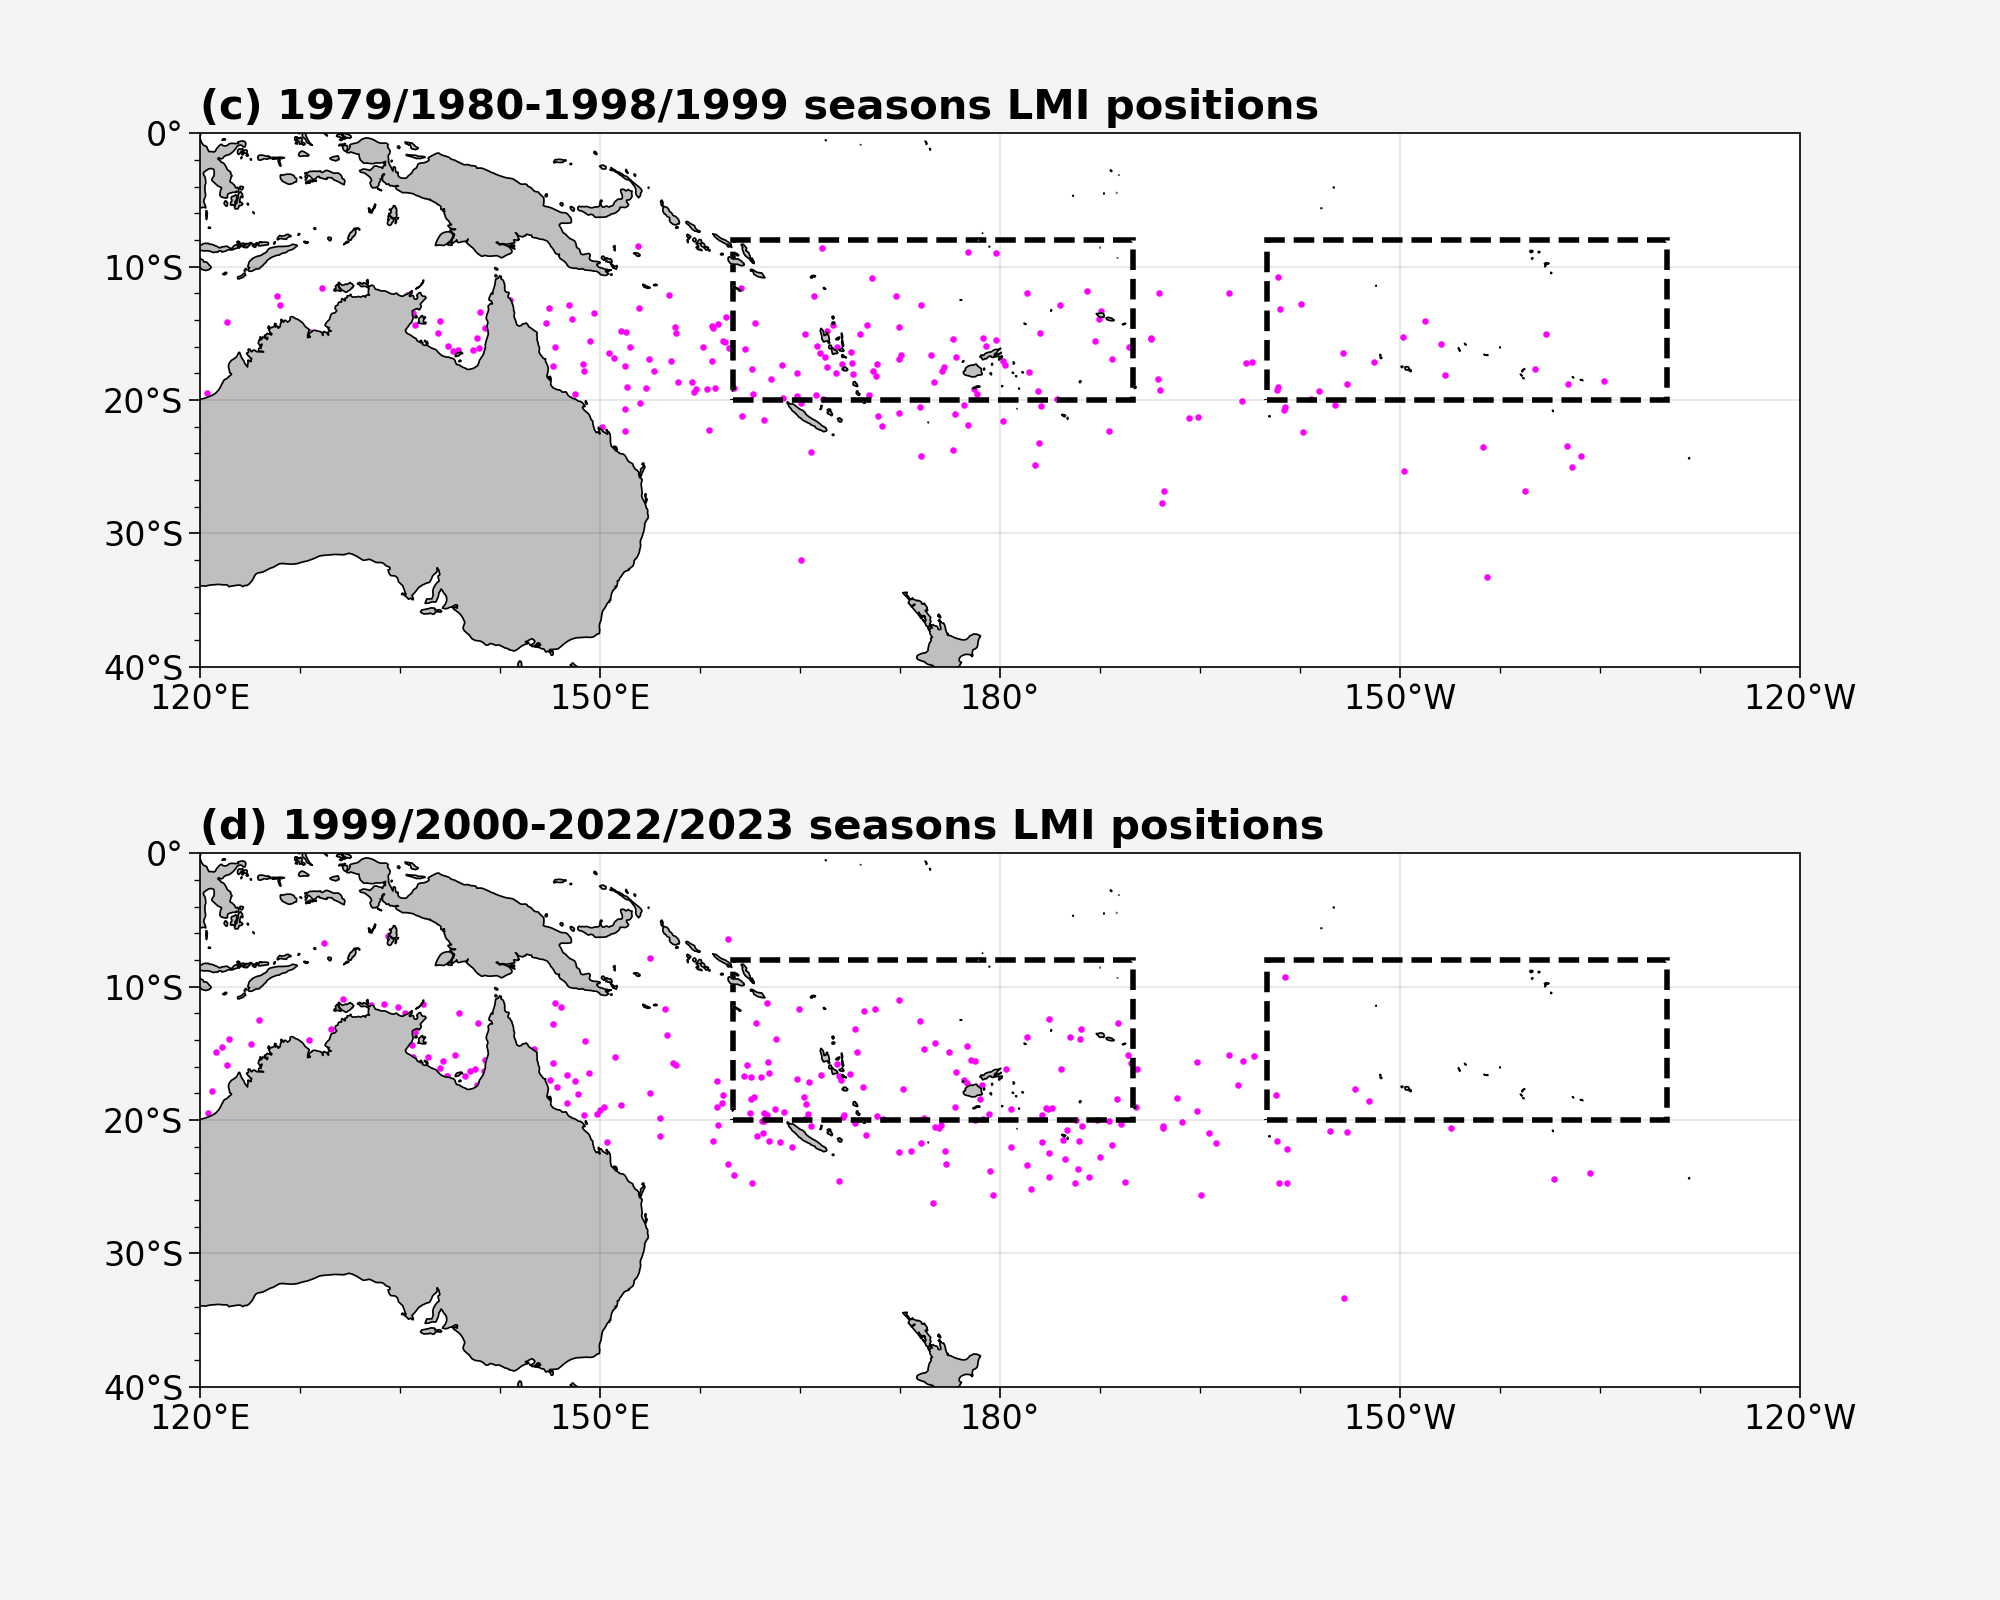

In [8]:
from matplotlib import rcParams
from matplotlib import patches
import cartopy.mpl.ticker as cticker
matplotlib.font_manager.fontManager.addfont('./font/SimHei.ttf') 
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False#用来正常显示负号


config = {
    "font.family": 'Times New Roman',
    "font.size": 12,
    "mathtext.fontset":'stix',
    'axes.unicode_minus': False 
         }
rcParams.update(config)
fig = plt.figure(figsize=(10,8))
proj = ccrs.PlateCarree(central_longitude=180)

leftlon, rightlon, lowerlat, upperlat = (120, 240, -40, 0)
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()

####### 图c
fig_ax1 = fig.add_axes([0.1, 0.35, 0.8, 0.8], projection = proj)
fig_ax1.set_global()
fig_ax1.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
land = cfeature.NaturalEarthFeature('physical','land','50m',edgecolor='face', facecolor=cfeature.COLORS['land'])
fig_ax1.add_feature(land,facecolor='0.75')
fig_ax1.add_feature(cfeature.COASTLINE.with_scale('50m'))

fig_ax1.set_xticks([ -150, -120, 120, 150, 180], crs=ccrs.PlateCarree())
fig_ax1.set_yticks(np.arange(-40,1,10), crs=ccrs.PlateCarree())

fig_ax1.xaxis.set_major_formatter(LongitudeFormatter())
fig_ax1.yaxis.set_major_formatter(LatitudeFormatter())

fig_ax1.set_title('(c) 1979/1980-1998/1999 seasons LMI positions',fontweight='bold',
                  loc='left',fontsize =15)

fig_ax1.scatter(df_max_Lon_Lat_phase1['LON'], df_max_Lon_Lat_phase1['LAT'],
        s=3, c = '#FF00FF', marker = 'o', 
        transform=ccrs.PlateCarree())
# 小于0的数均加上360
df_max_Lon_Lat_phase1['LON'] = df_max_Lon_Lat_phase1['LON'].mask(df_max_Lon_Lat_phase1['LON'] < 0,(df_max_Lon_Lat_phase1['LON'] + 360))

black_quarter_c1 = patches.Rectangle((160,-20),30,12,linestyle = 'dashed', 
                                  lw=2, edgecolor='black', facecolor='none',transform=ccrs.PlateCarree())
black_quarter_c2 = patches.Rectangle((200,-20),30,12,linestyle = 'dashed', 
                                  lw=2, edgecolor='black', facecolor='none',transform=ccrs.PlateCarree())
fig_ax1.add_patch(black_quarter_c1)
fig_ax1.add_patch(black_quarter_c2)

# ======================= 图d =============================

fig_ax2 = fig.add_axes([0.1, -0.1, 0.8, 0.8], projection = proj)
fig_ax2.set_global()
fig_ax2.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
land = cfeature.NaturalEarthFeature('physical','land','50m',edgecolor='face', facecolor=cfeature.COLORS['land'])
fig_ax2.add_feature(land,facecolor='0.75')
fig_ax2.add_feature(cfeature.COASTLINE.with_scale('50m'))

fig_ax2.set_xticks([ -150, -120, 120, 150, 180], crs=ccrs.PlateCarree())
fig_ax2.set_yticks(np.arange(-40,1,10), crs=ccrs.PlateCarree())

fig_ax2.xaxis.set_major_formatter(LongitudeFormatter())
fig_ax2.yaxis.set_major_formatter(LatitudeFormatter())

fig_ax2.set_title('(d) 1999/2000-2022/2023 seasons LMI positions',fontweight='bold',
                  loc='left',fontsize =15)

fig_ax2.scatter(df_max_Lon_Lat_phase2['LON'], df_max_Lon_Lat_phase2['LAT'],
        s=3, c = '#FF00FF', marker = 'o', 
        transform=ccrs.PlateCarree())
# 小于0的数均加上360
df_max_Lon_Lat_phase2['LON'] = df_max_Lon_Lat_phase2['LON'].mask(df_max_Lon_Lat_phase2['LON'] < 0,(df_max_Lon_Lat_phase2['LON'] + 360))

black_quarter_d1 = patches.Rectangle((160,-20),30,12,linestyle = 'dashed', 
                                  lw=2, edgecolor='black', facecolor='none',transform=ccrs.PlateCarree())
black_quarter_d2 = patches.Rectangle((200,-20),30,12,linestyle = 'dashed', 
                                  lw=2, edgecolor='black', facecolor='none',transform=ccrs.PlateCarree())
fig_ax2.add_patch(black_quarter_d1)
fig_ax2.add_patch(black_quarter_d2)

plt.savefig("Storm0304_max.png",dpi=300,bbox_inches='tight')
plt.show()

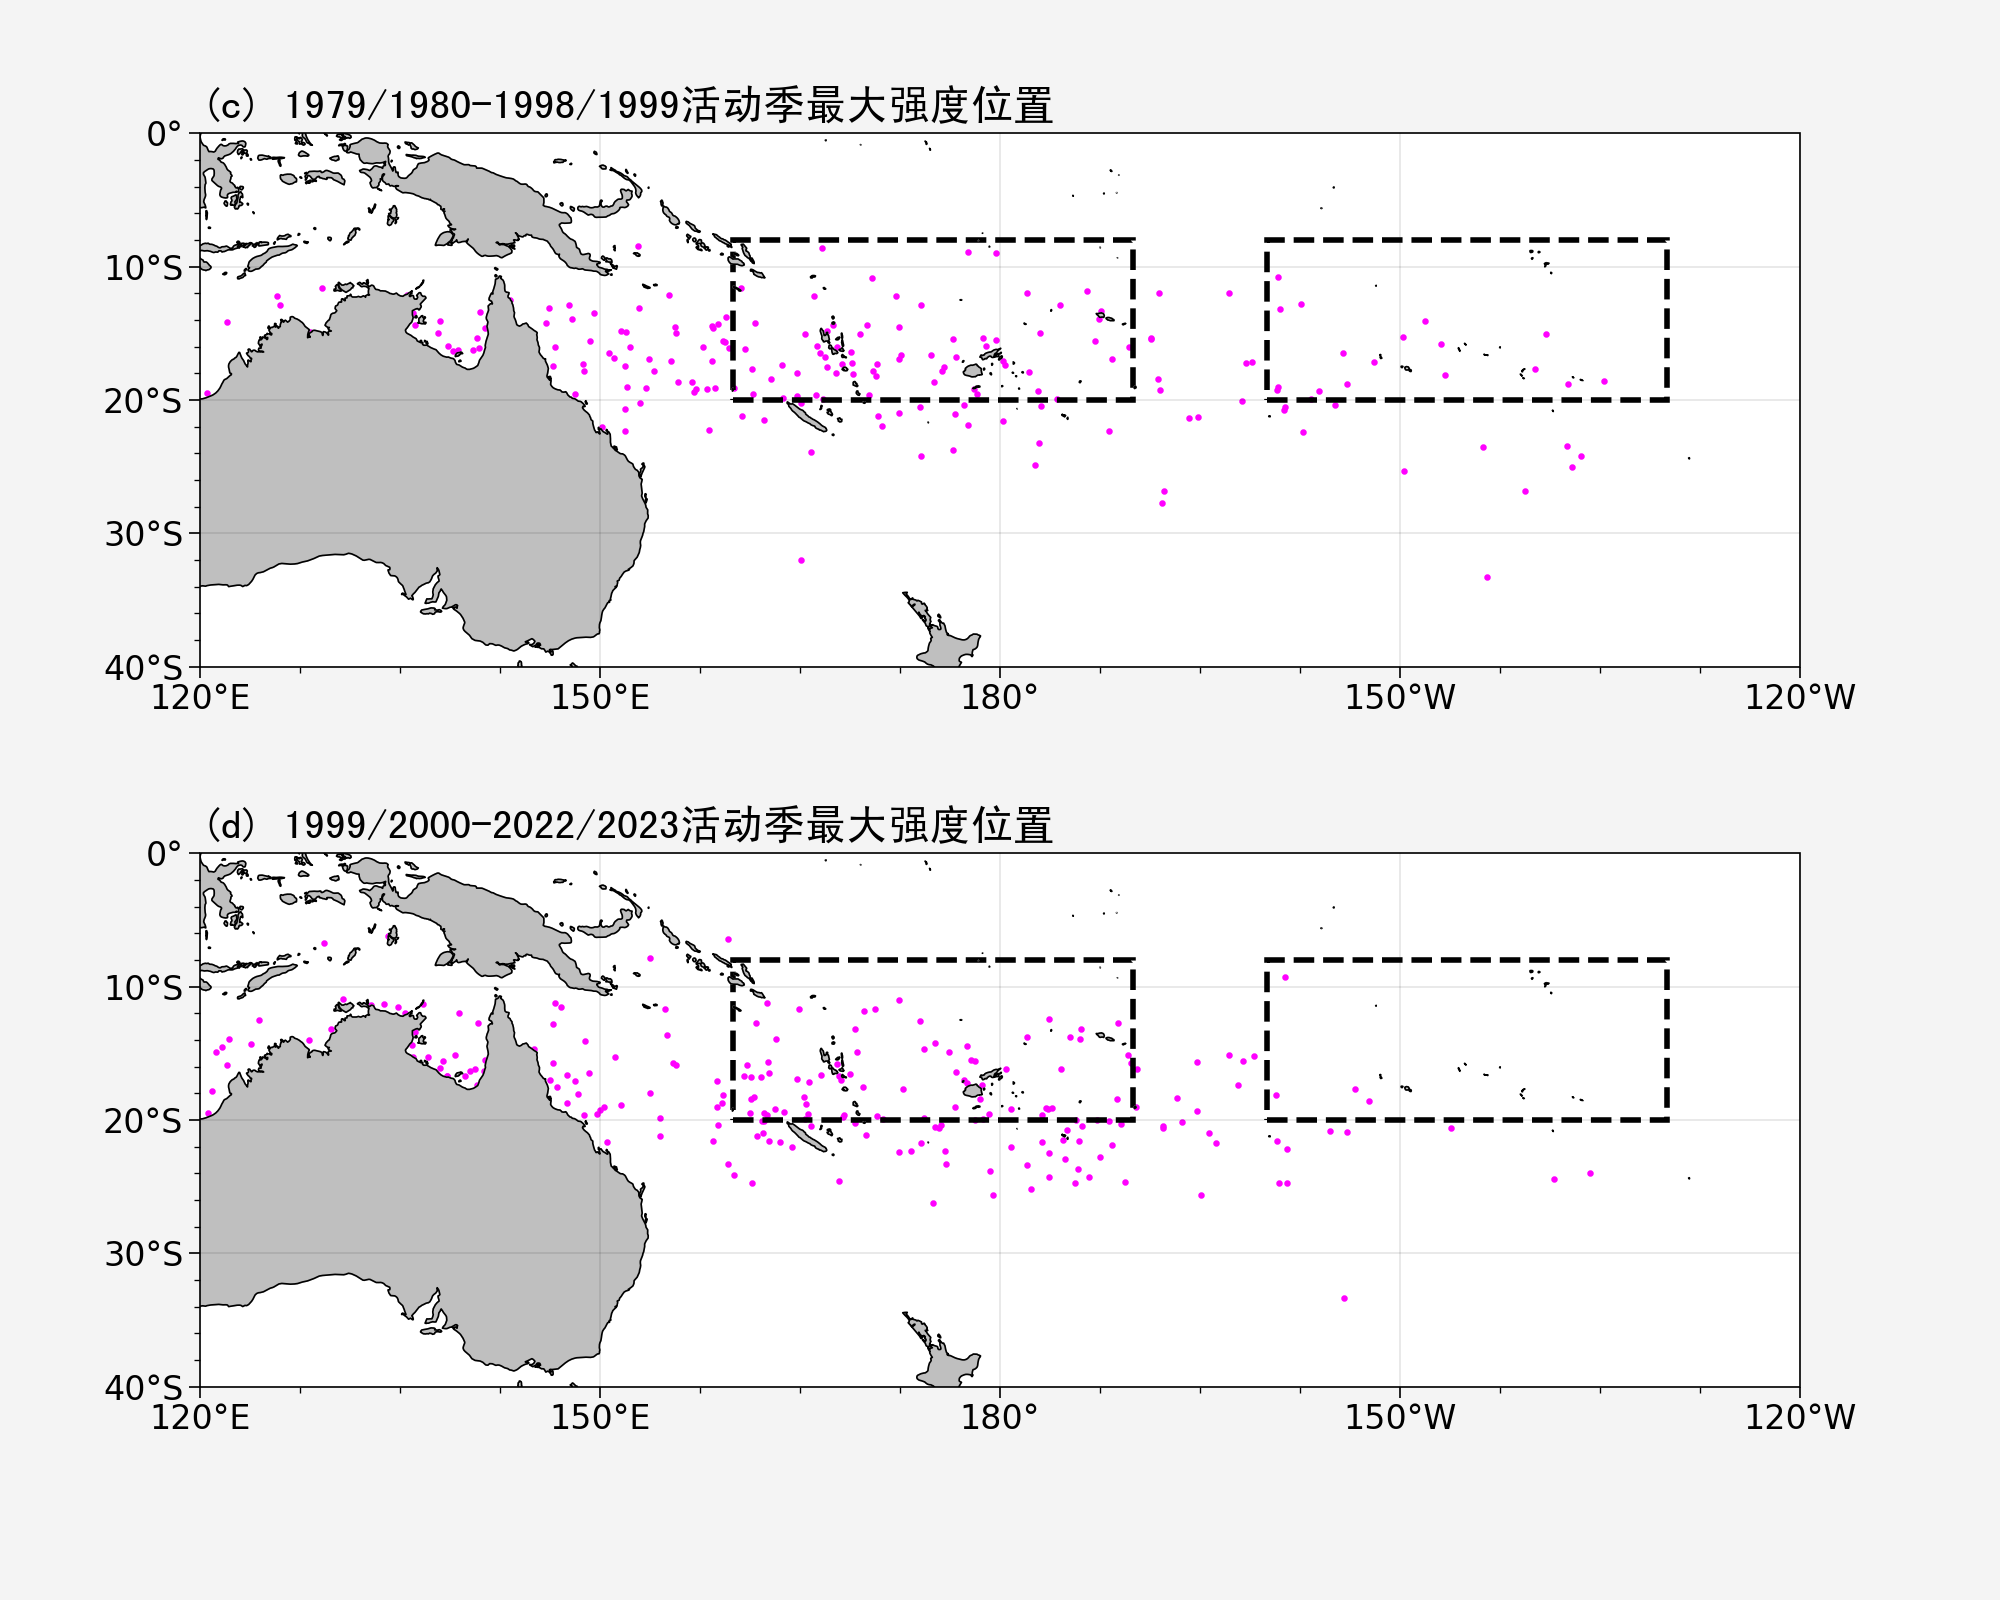

In [9]:
from matplotlib import rcParams
from matplotlib import patches
import cartopy.mpl.ticker as cticker
matplotlib.font_manager.fontManager.addfont('./font/SimHei.ttf') 
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False#用来正常显示负号


config = {
    "font.family": 'Times New Roman',
    "font.size": 12,
    "mathtext.fontset":'stix',
    'axes.unicode_minus': False 
         }
rcParams.update(config)
fig = plt.figure(figsize=(10,8))
proj = ccrs.PlateCarree(central_longitude=180)

leftlon, rightlon, lowerlat, upperlat = (120, 240, -40, 0)
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()

####### 图c
fig_ax1 = fig.add_axes([0.1, 0.35, 0.8, 0.8], projection = proj)
fig_ax1.set_global()
fig_ax1.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
land = cfeature.NaturalEarthFeature('physical','land','50m',edgecolor='face', facecolor=cfeature.COLORS['land'])
fig_ax1.add_feature(land,facecolor='0.75')
fig_ax1.add_feature(cfeature.COASTLINE.with_scale('50m'))

fig_ax1.set_xticks([ -150, -120, 120, 150, 180], crs=ccrs.PlateCarree())
fig_ax1.set_yticks(np.arange(-40,1,10), crs=ccrs.PlateCarree())

fig_ax1.xaxis.set_major_formatter(LongitudeFormatter())
fig_ax1.yaxis.set_major_formatter(LatitudeFormatter())

fig_ax1.set_title('(c) 1979/1980-1998/1999活动季最大强度位置',fontweight='bold',
                  loc='left',fontsize =15,fontproperties='SimHei')

fig_ax1.scatter(df_max_Lon_Lat_phase1['LON'], df_max_Lon_Lat_phase1['LAT'],
        s=3, c = '#FF00FF', marker = 'o', 
        transform=ccrs.PlateCarree())
# 小于0的数均加上360
df_max_Lon_Lat_phase1['LON'] = df_max_Lon_Lat_phase1['LON'].mask(df_max_Lon_Lat_phase1['LON'] < 0,(df_max_Lon_Lat_phase1['LON'] + 360))

black_quarter_c1 = patches.Rectangle((160,-20),30,12,linestyle = 'dashed', 
                                  lw=2, edgecolor='black', facecolor='none',transform=ccrs.PlateCarree())
black_quarter_c2 = patches.Rectangle((200,-20),30,12,linestyle = 'dashed', 
                                  lw=2, edgecolor='black', facecolor='none',transform=ccrs.PlateCarree())
fig_ax1.add_patch(black_quarter_c1)
fig_ax1.add_patch(black_quarter_c2)

# ======================= 图d =============================

fig_ax2 = fig.add_axes([0.1, -0.1, 0.8, 0.8], projection = proj)
fig_ax2.set_global()
fig_ax2.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
land = cfeature.NaturalEarthFeature('physical','land','50m',edgecolor='face', facecolor=cfeature.COLORS['land'])
fig_ax2.add_feature(land,facecolor='0.75')
fig_ax2.add_feature(cfeature.COASTLINE.with_scale('50m'))

fig_ax2.set_xticks([ -150, -120, 120, 150, 180], crs=ccrs.PlateCarree())
fig_ax2.set_yticks(np.arange(-40,1,10), crs=ccrs.PlateCarree())

fig_ax2.xaxis.set_major_formatter(LongitudeFormatter())
fig_ax2.yaxis.set_major_formatter(LatitudeFormatter())

fig_ax2.set_title('(d) 1999/2000-2022/2023活动季最大强度位置',fontweight='bold',
                  loc='left',fontsize =15,fontproperties='SimHei')

fig_ax2.scatter(df_max_Lon_Lat_phase2['LON'], df_max_Lon_Lat_phase2['LAT'],
        s=3, c = '#FF00FF', marker = 'o', 
        transform=ccrs.PlateCarree())
# 小于0的数均加上360
df_max_Lon_Lat_phase2['LON'] = df_max_Lon_Lat_phase2['LON'].mask(df_max_Lon_Lat_phase2['LON'] < 0,(df_max_Lon_Lat_phase2['LON'] + 360))

black_quarter_d1 = patches.Rectangle((160,-20),30,12,linestyle = 'dashed', 
                                  lw=2, edgecolor='black', facecolor='none',transform=ccrs.PlateCarree())
black_quarter_d2 = patches.Rectangle((200,-20),30,12,linestyle = 'dashed', 
                                  lw=2, edgecolor='black', facecolor='none',transform=ccrs.PlateCarree())
fig_ax2.add_patch(black_quarter_d1)
fig_ax2.add_patch(black_quarter_d2)

plt.savefig("Storm0304_max_cn.png",dpi=300,bbox_inches='tight')
plt.show()